In [1]:
import numpy as np
import cupy as cp
import warnings
import os

gpu_available = True


from few.trajectory.inspiral import EMRIInspiral
from few.amplitude.romannet import RomanAmplitude
from few.amplitude.interp2dcubicspline import Interp2DAmplitude
from few.waveform import FastSchwarzschildEccentricFlux, SlowSchwarzschildEccentricFlux
from few.utils.utility import get_overlap, get_mismatch, get_separatrix, get_fundamental_frequencies
from few.utils.ylm import GetYlms
from few.utils.modeselector import ModeSelector
from few.summation.interpolatedmodesum import CubicSplineInterpolant
from few.utils.constants import *
from few.utils.baseclasses import SchwarzschildEccentric, Pn5AAK, ParallelModuleBase
from few.waveform import AAKWaveformBase, Pn5AAKWaveform
from few.summation.aakwave import AAKSummation

import matplotlib.pyplot as plt

from few.utils.utility import get_p_at_t

import time
import warnings

    
traj = EMRIInspiral(func="pn5")

In [2]:
from fisher import StableEMRIFisher

In [3]:
#set initial parameters (default parameters in FEW 5PNAAK Documentation)
M = 1e6
mu = 10
a = 0.9
p0 = 8.05
e0 = 0.1
iota0 = 1.0
Y0 = np.cos(iota0)
Phi_phi0 = 2
Phi_theta0 = 3
Phi_r0 = 1.5

qS = 0.2
phiS = 0.2
qK = 0.8
phiK = 0.8
dist = 1
mich = True #mich = True implies output in hI, hII long wavelength approximation
dt = 10.0
T = 1.0

plotting covariance ellipses...


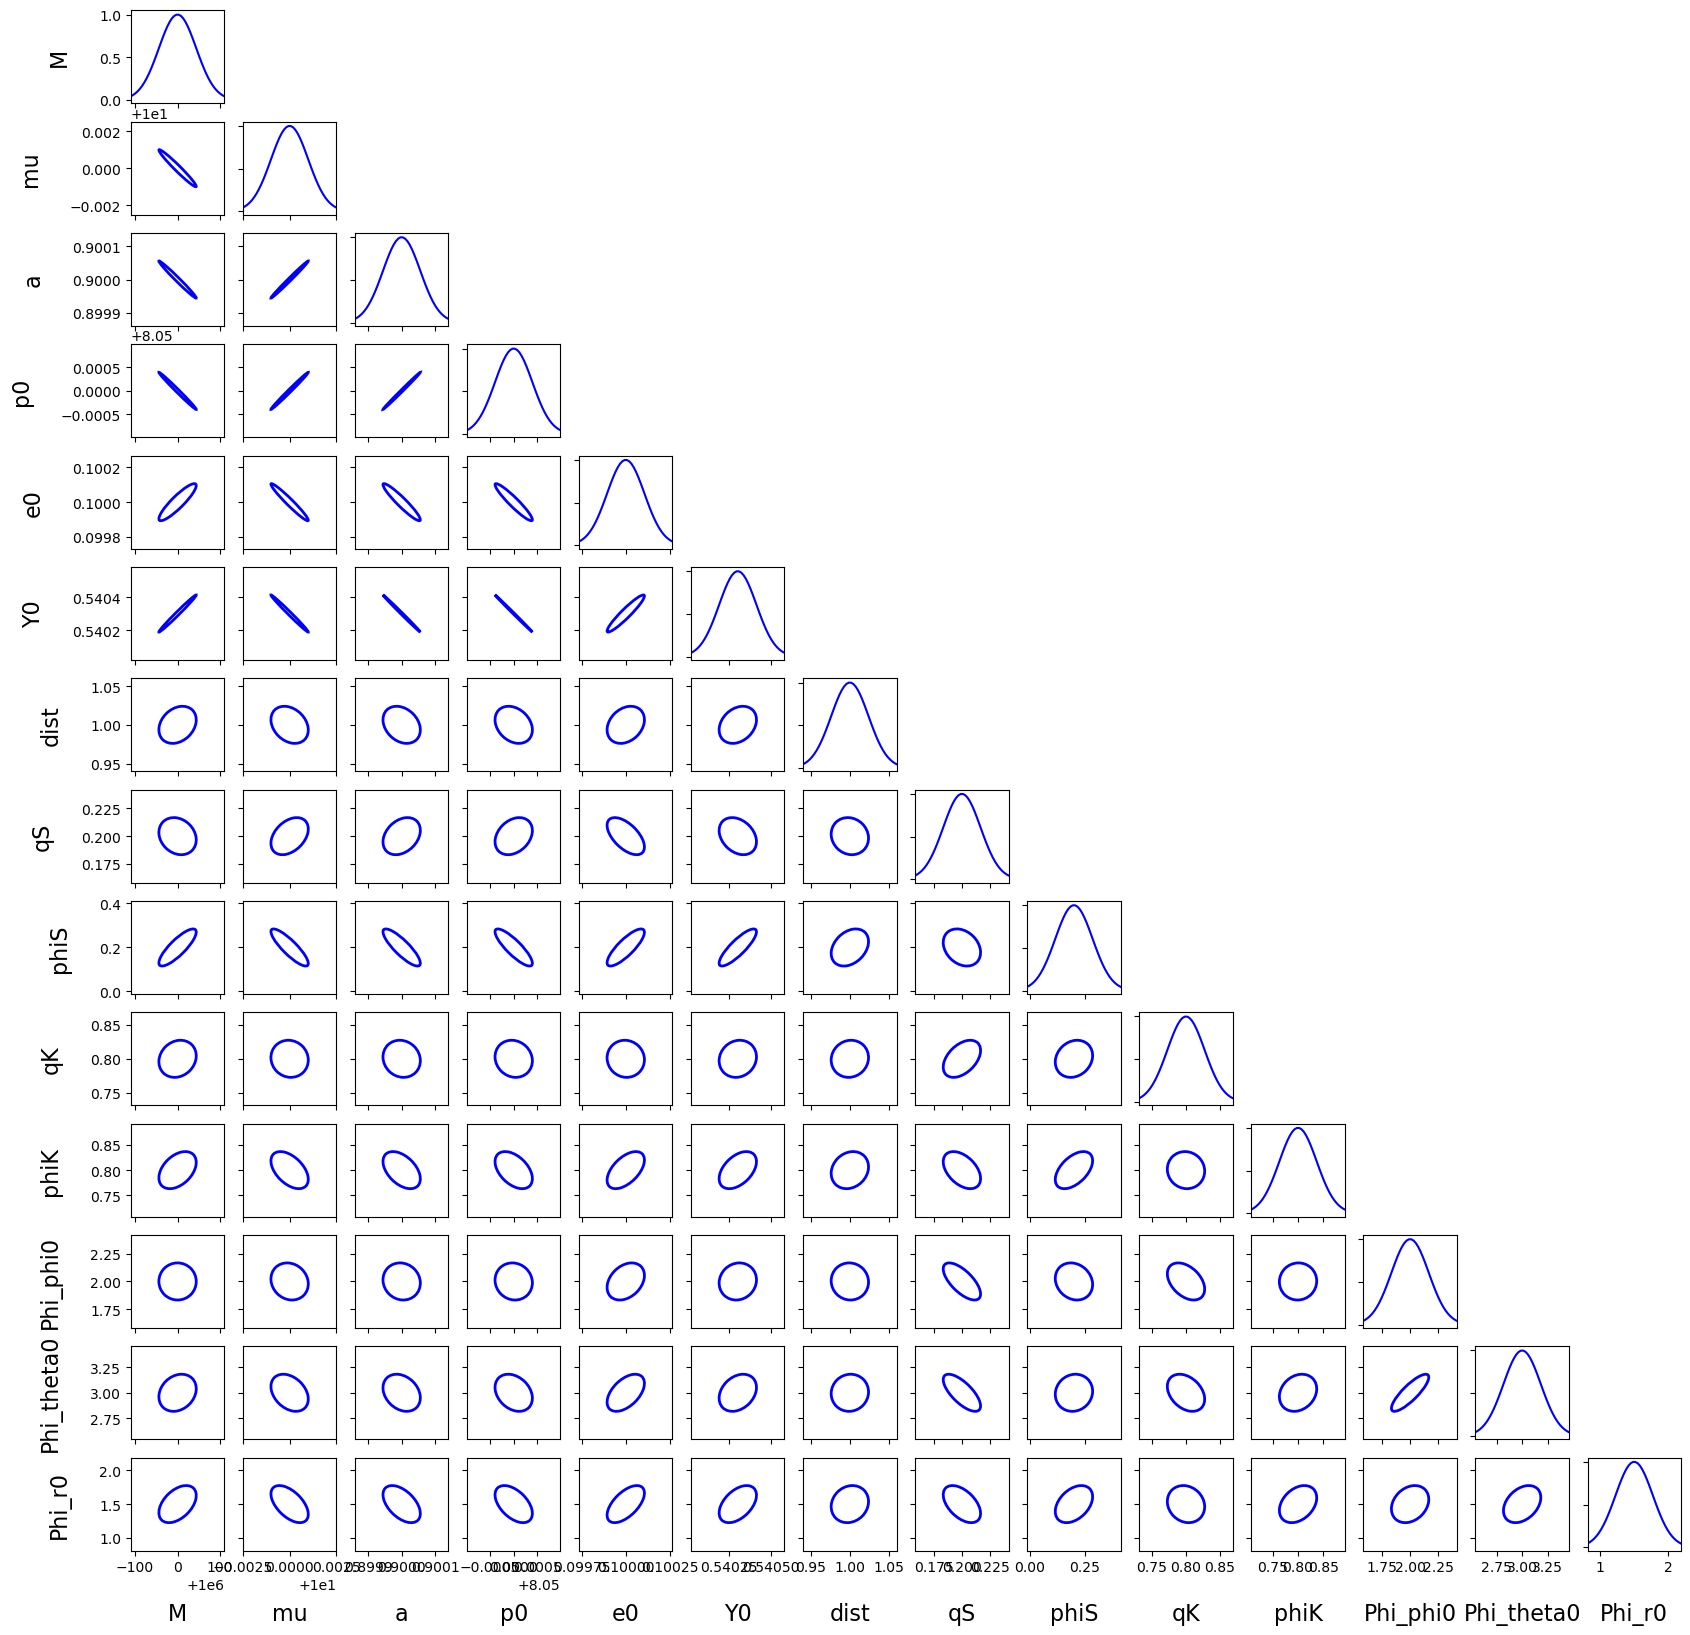

In [5]:
#initialization
sef = StableEMRIFisher(M, mu, a, p0, e0, Y0, dist, qS, phiS, qK, phiK,
              Phi_phi0, Phi_theta0, Phi_r0, dt, T, deltas={'M': 0.005179474679231213, 'mu': 5.1794746792312124e-08, 'a': 3.3548343482834466e-08, 'p0': 5.793469667659284e-09, 'e0': 3.727593720314938e-09, 'Y0': 2.014027482425755e-08, 'dist': 1.3894954943731361e-05, 'qS': 2.7789909887462724e-06, 'phiS': 5.3653915905594555e-05, 'qK': 1.1115963954985093e-05, 'phiK': 1.1115963954985093e-05, 'Phi_phi0': 0.000536539159055945, 'Phi_theta0': 0.0008048087385839177, 'Phi_r0': 0.0004024043692919588},
              filename='TestRun', CovMat=True, CovEllipse=True)

#execution
covariance = np.linalg.inv(np.loadtxt('TestRun/Fisher.txt'))
sef.CovEllipsePlot(covariance)